In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/gurgaon_properties_cleaned.csv')
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2839,flat,ats marigold,sector 89,1.85,8604.0,2150.0,Super Built up area 2150(199.74 sq.m.),3,3,3+,...,2150.0,NaN,NaN,0,1,0,0,0,0,37
1871,flat,central park resort belgravia residences,sector 48,6.25,24300.0,2572.0,Carpet area: 2880 (267.56 sq.m.),3,5,3+,...,NaN,NaN,2880.0,0,1,0,0,0,1,49
365,flat,m3m capital,sector 113,2.90,12619.0,2298.0,Carpet area: 2298 (213.49 sq.m.),4,4,3+,...,NaN,NaN,2298.0,1,1,0,0,0,0,49
1774,flat,aipl zen residences,sector 70a,1.40,11094.0,1262.0,Built Up area: 1262 (117.24 sq.m.)Carpet area:...,2,2,2,...,NaN,1262.0,800.0,0,0,0,0,0,0,0
2377,flat,raheja navodaya,sector 92,0.85,4271.0,1990.0,Super Built up area 1990(184.88 sq.m.),3,3,3,...,1990.0,NaN,NaN,0,0,0,0,0,0,100


In [6]:
df.shape

(3677, 23)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3677 entries, 0 to 3676
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3677 non-null   object 
 1   society              3676 non-null   object 
 2   sector               3677 non-null   object 
 3   price                3660 non-null   float64
 4   price_per_sqft       3660 non-null   float64
 5   area                 3660 non-null   float64
 6   areaWithType         3677 non-null   object 
 7   bedRoom              3677 non-null   int64  
 8   bathroom             3677 non-null   int64  
 9   balcony              3677 non-null   object 
 10  floorNum             3658 non-null   float64
 11  facing               2632 non-null   object 
 12  agePossession        3677 non-null   object 
 13  super_built_up_area  1875 non-null   float64
 14  built_up_area        1690 non-null   float64
 15  carpet_area          1872 non-null   f

In [8]:
df['society']=df['society'].str.strip()

In [9]:
df['society']=df['society'].replace('.','nul')

In [10]:
df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(75)

,proportion
society,
tulip violet,0.023511
ss the leaf,0.046395
dlf new town heights,0.059561
shapoorji pallonji joyville gurugram,0.072727
signature global park,0.083699
...,...
indiabulls enigma,0.490282
ramsons kshitij,0.494357
umang monsoon breeze,0.498433


In [11]:
society_counts=df['society'].value_counts()
frequency_bins = {
    "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': np.int64(1),
 'High (50-100)': np.int64(2),
 'Average (10-49)': np.int64(92),
 'Low (2-9)': np.int64(273),
 'Very Low (1)': np.int64(307)}

<Axes: xlabel='society'>

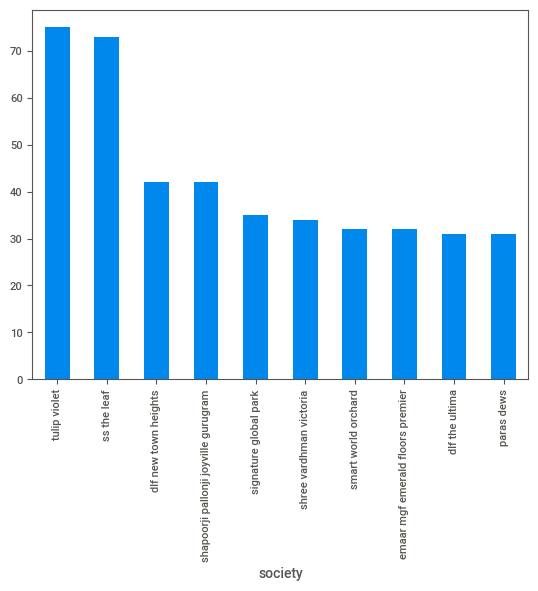

In [12]:
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')

*   Large number of properties comes under independent tag.
There are 675 societies.
*   The top 75 societies have 50 percent of the preperties and the rest 50 percent of the properties come under the remaining 600 societies
* Very High (>100): Only 1 society has more than 100 listings.
* High (50-100): 2 societies have between 50 to 100 listings.
* Average (10-49): 92 societies fall in this range with 10 to 49 listings each.
* Low (2-9): 273 societies have between 2 to 9 listings.
* Very Low (1): A significant number, 308 societies, have only 1 listing.

1 missing value









In [13]:
df['sector'].value_counts().shape

(104,)

<Axes: xlabel='sector'>

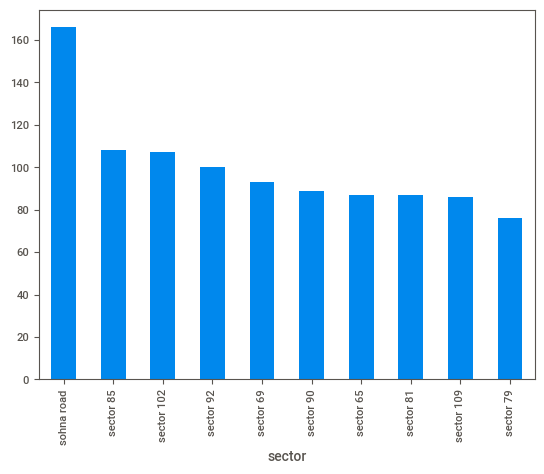

In [14]:
df['sector'].value_counts().head(10).plot(kind='bar')

In [15]:
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': np.int64(3),
 'High (50-100)': np.int64(25),
 'Average (10-49)': np.int64(60),
 'Low (2-9)': np.int64(16),
 'Very Low (1)': np.int64(0)}

In [16]:
df['price'].describe()

,price
count,3660.000000
mean,2.533664
std,2.980623
min,0.070000
25%,0.950000
50%,1.520000
75%,2.750000
max,31.500000


In [17]:
df['price'].isnull().sum()

np.int64(17)

<Axes: xlabel='price', ylabel='Count'>

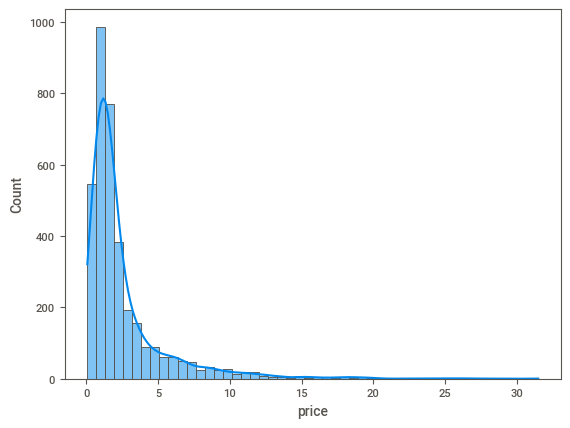

In [18]:
sns.histplot(df['price'],kde=True,bins=50)

<Axes: xlabel='price'>

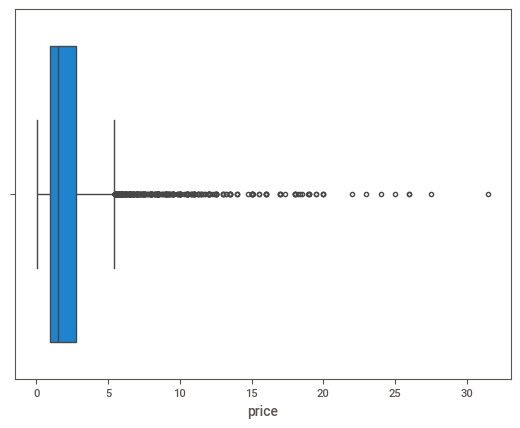

In [19]:
sns.boxplot(x=df['price'])

In [20]:
skewness=df['price'].skew()
kurtosis=df['price'].kurt()
print(skewness,kurtosis)

3.2791704733134623 14.933372629214258


In [21]:
quantiles=df['price'].quantile([0.01,0.05,0.95,0.99])
quantiles

,price
0.01,0.250
0.05,0.370
0.95,8.500
0.99,15.264


In [22]:
#identifying outliers
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
IQR = Q3 - Q1

IQR

np.float64(1.8)

In [23]:
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(lower_bound,upper_bound)

-1.7500000000000002 5.45


In [24]:
outliers=df[(df['price']<lower_bound)|(df['price']>upper_bound)]
outliers.shape

(425, 23)

In [25]:
outliers['price'].describe()

,price
count,425.000000
mean,9.235624
std,4.065259
min,5.460000
25%,6.460000
50%,8.000000
75%,10.750000
max,31.500000


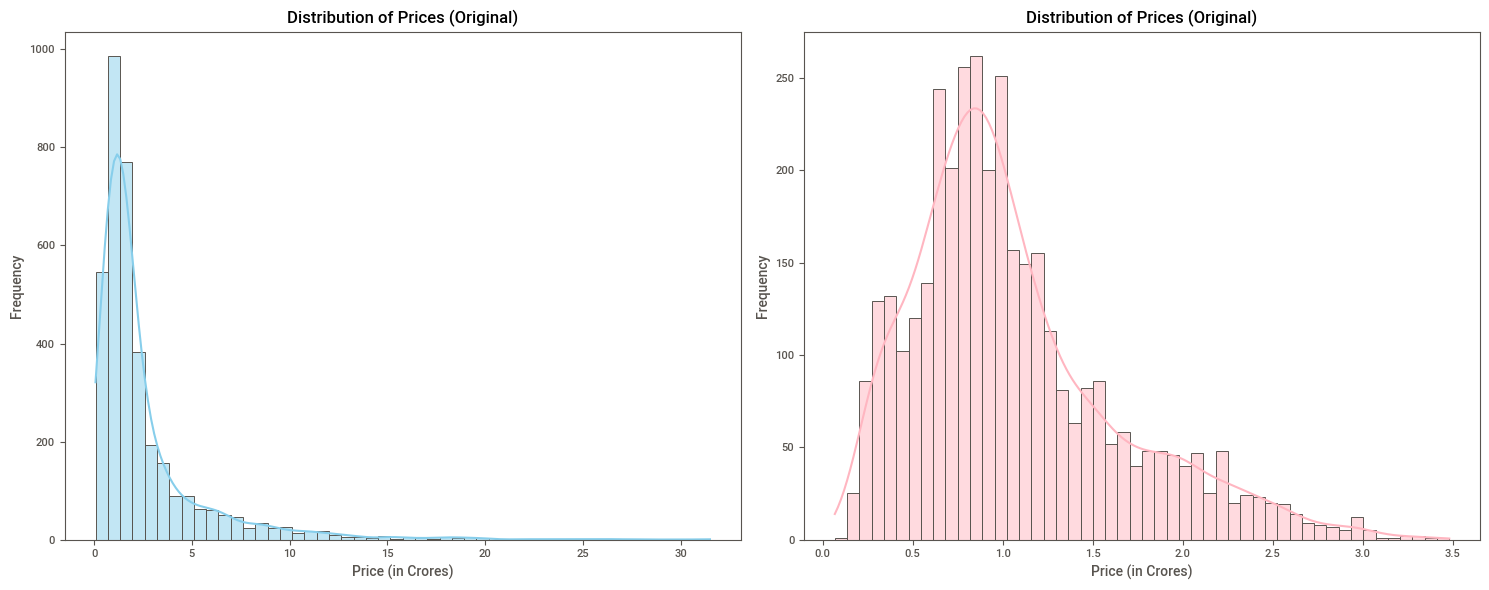

In [26]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.histplot(np.log1p(df['price']),kde=True,bins=50, color='lightpink')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [27]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness,kurtosis)

1.0740709565255318 0.9646692415449296


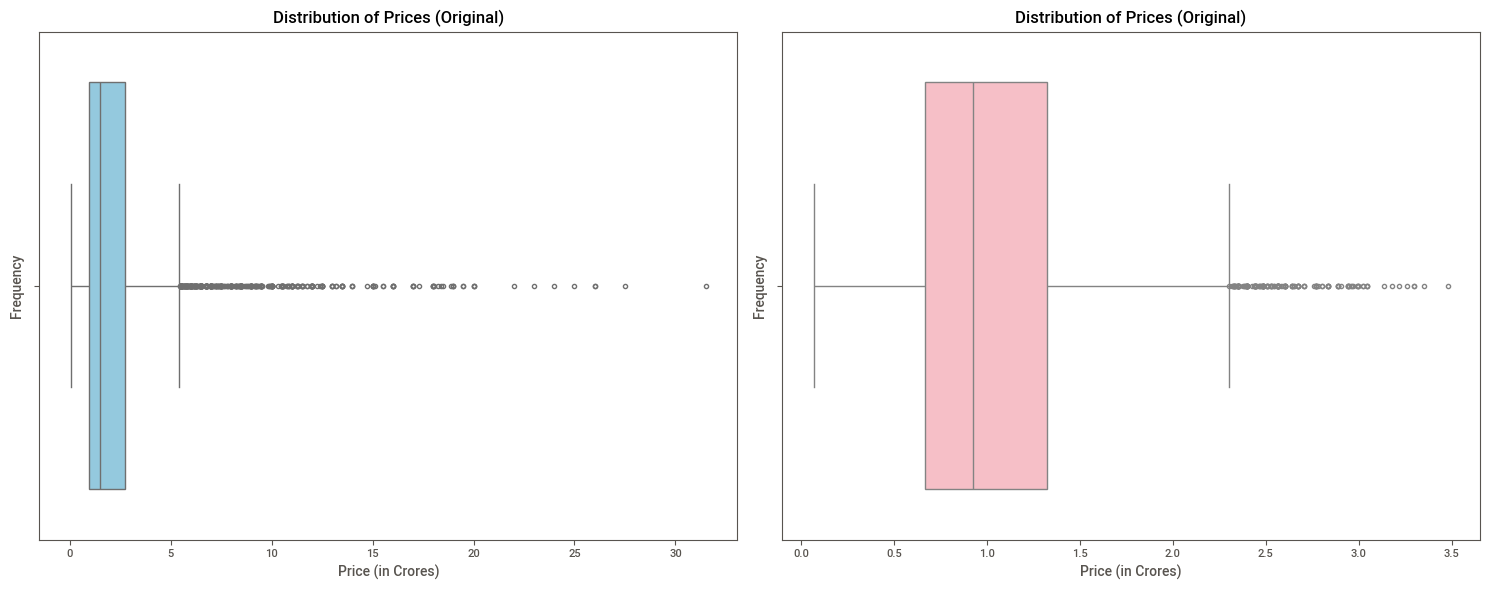

In [28]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(x=df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.boxplot(x=np.log1p(df['price']),color='lightpink')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [29]:
df['price_per_sqft'].isnull().sum()

np.int64(17)

In [30]:
df['price_per_sqft'].describe()

,price_per_sqft
count,3660.000000
mean,13892.668306
std,23210.067190
min,4.000000
25%,6817.250000
50%,9020.000000
75%,13880.500000
max,600000.000000


<Axes: xlabel='price_per_sqft', ylabel='Count'>

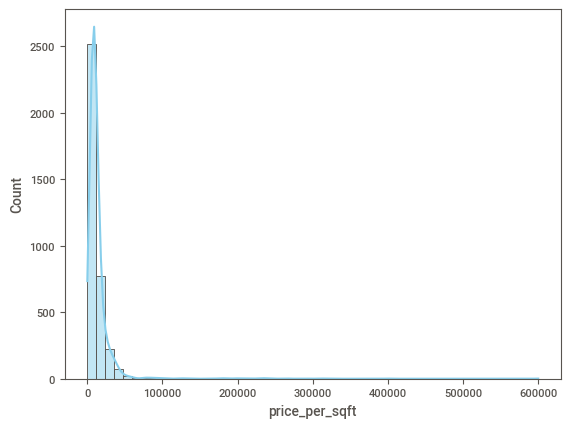

In [31]:
sns.histplot(df['price_per_sqft'], bins=50, color='skyblue', kde=True)

In [32]:
skewness=df['price_per_sqft'].skew()
kurtosis=df['price_per_sqft'].kurt()
print(skewness,kurtosis)

11.4371904262371 186.9280132353288


<Axes: xlabel='price_per_sqft'>

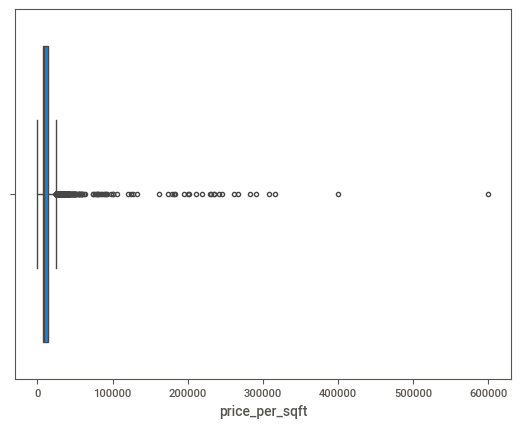

In [33]:
sns.boxplot(x=df['price_per_sqft'])

In [34]:
df['bedRoom'].isnull().sum()

np.int64(0)

<Axes: xlabel='bedRoom'>

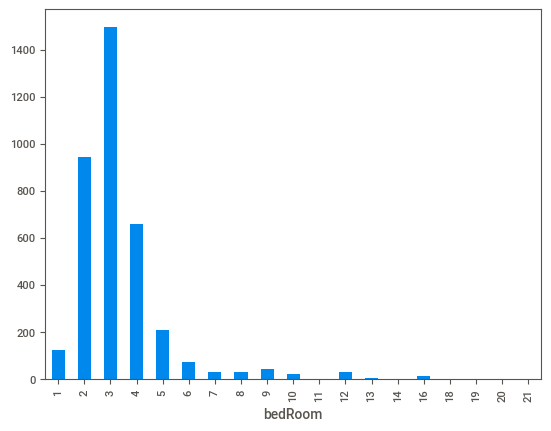

In [35]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

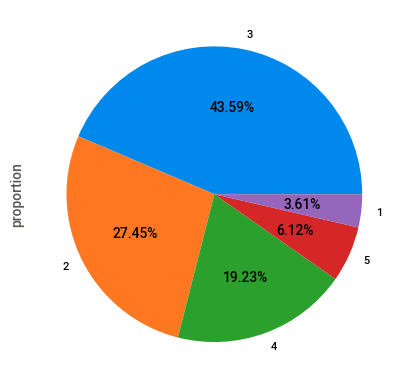

In [36]:
df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

<Axes: xlabel='bathroom'>

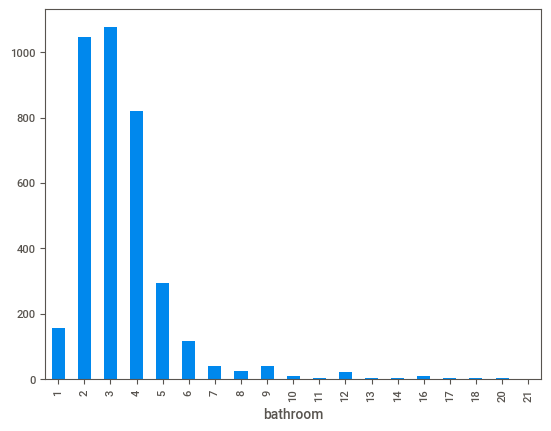

In [37]:
df['bathroom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

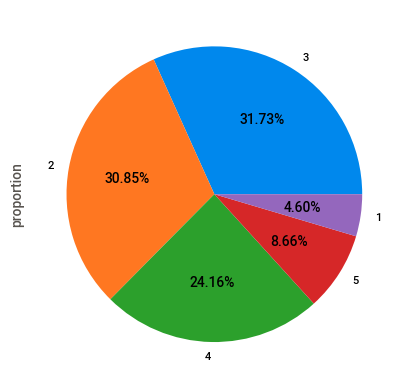

In [38]:
df['bathroom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

<Axes: xlabel='balcony'>

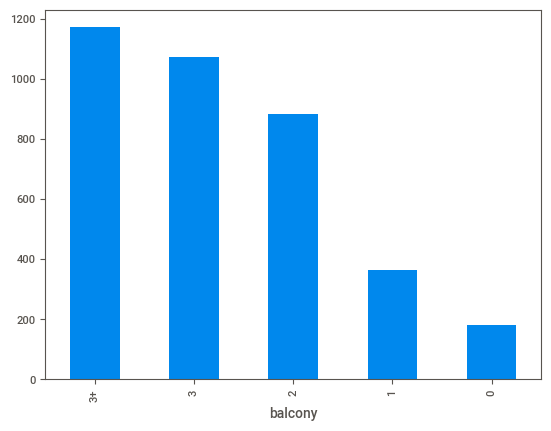

In [39]:
df['balcony'].value_counts().plot(kind='bar')

<Axes: ylabel='proportion'>

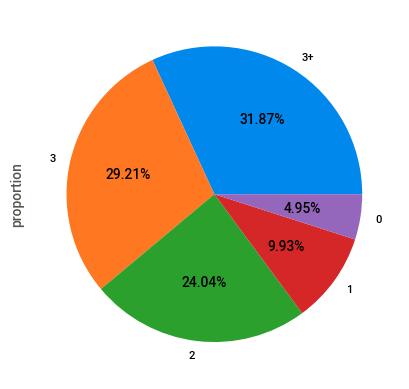

In [40]:
df['balcony'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [41]:
df['floorNum'].isnull().sum()

np.int64(19)

In [42]:
df['floorNum'].describe()

,floorNum
count,3658.000000
mean,6.798250
std,6.012454
min,0.000000
25%,2.000000
50%,5.000000
75%,10.000000
max,51.000000


<Axes: xlabel='floorNum'>

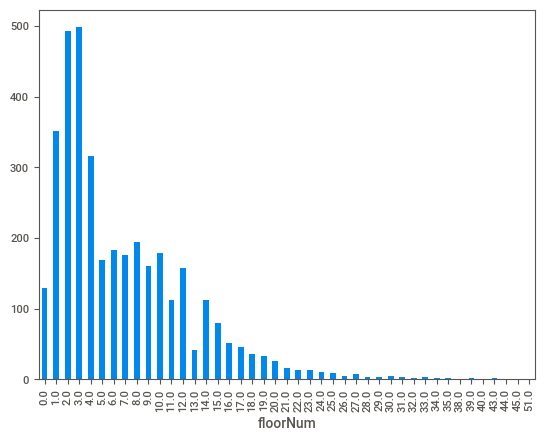

In [43]:
df['floorNum'].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='floorNum'>

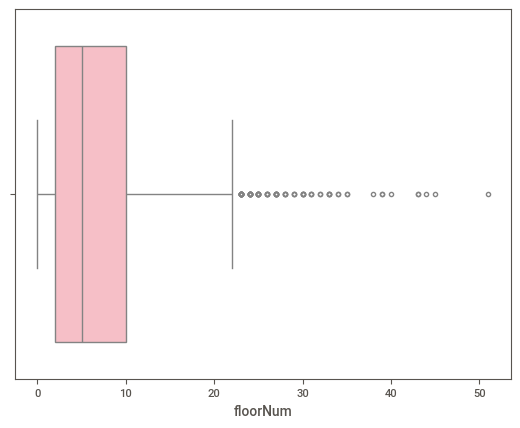

In [44]:
sns.boxplot(x=df['floorNum'],color='lightpink')

In [45]:
df['facing'].isnull().sum()

np.int64(1045)

In [46]:
df['facing'].value_counts()

,count
facing,
North-East,623
East,623
North,387
West,249
South,231
North-West,193
South-East,173
South-West,153


In [47]:
df['facing'].fillna('NA',inplace=True)

/tmp/ipython-input-3692945726.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['facing'].fillna('NA',inplace=True)


In [48]:
df['agePossession'].isnull().sum()

np.int64(0)

In [49]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1646
New Property,593
Moderately Old,563
Undefined,306
Old Property,303
Under Construction,266


In [50]:
df['super_built_up_area'].isnull().sum()

np.int64(1802)

In [51]:
df['super_built_up_area'].describe()

,super_built_up_area
count,1875.000000
mean,1925.237627
std,764.172177
min,89.000000
25%,1479.500000
50%,1828.000000
75%,2215.000000
max,10000.000000


<Axes: xlabel='super_built_up_area', ylabel='Count'>

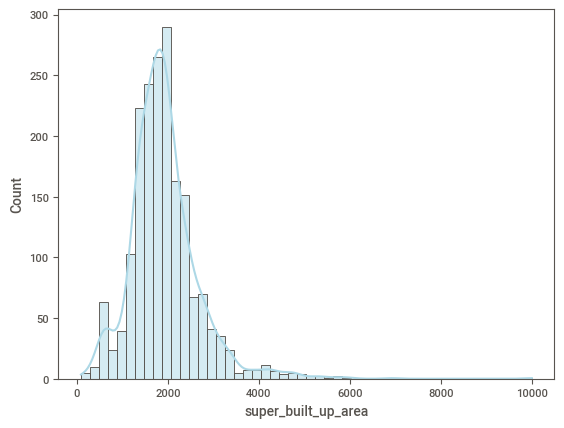

In [52]:
sns.histplot(df['super_built_up_area'],kde=True,bins=50,color='lightblue')

In [53]:
skewness=df['super_built_up_area'].skew()
kurtosis=df['super_built_up_area'].kurt()
print(skewness,kurtosis)

1.8364563282220419 10.349190949450698


<Axes: xlabel='super_built_up_area'>

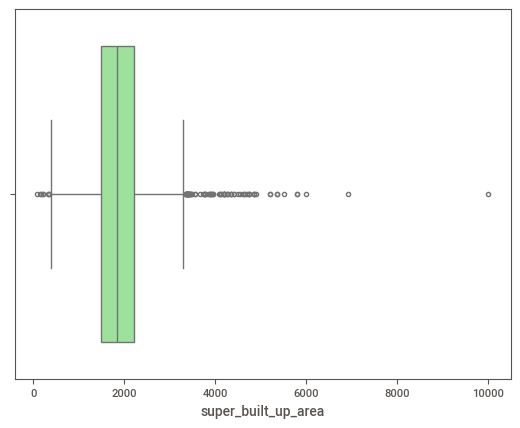

In [54]:
sns.boxplot(x=df['super_built_up_area'],color='lightgreen')

In [55]:
df['built_up_area'].isnull().sum()

np.int64(1987)

In [56]:
df['built_up_area'].describe()

,built_up_area
count,1690.000000
mean,2379.585816
std,17942.880237
min,2.000000
25%,1100.000000
50%,1650.000000
75%,2400.000000
max,737147.000000


<Axes: xlabel='built_up_area', ylabel='Count'>

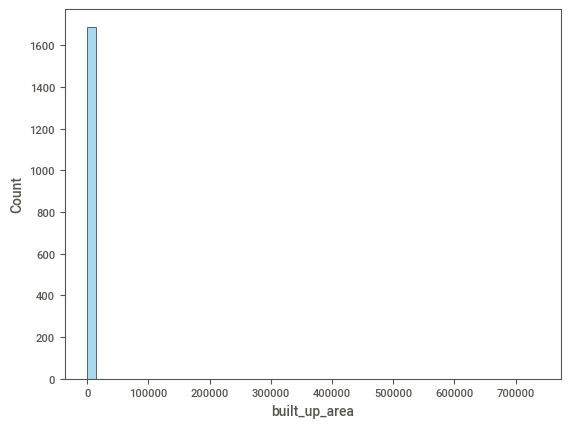

In [57]:
sns.histplot(df['built_up_area'], bins=50, color='skyblue')

In [58]:
df['carpet_area'].isnull().sum()

np.int64(1805)

In [59]:
df['carpet_area'].describe()

,carpet_area
count,1872.000000
mean,2529.179507
std,22799.836449
min,15.000000
25%,843.000000
50%,1300.000000
75%,1790.000000
max,607936.000000


<Axes: xlabel='carpet_area', ylabel='Count'>

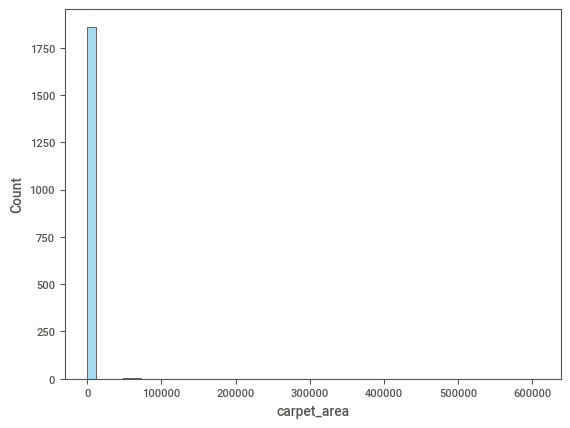

In [60]:
sns.histplot(df['carpet_area'], bins=50, color='skyblue', kde=False)

<Axes: xlabel='carpet_area'>

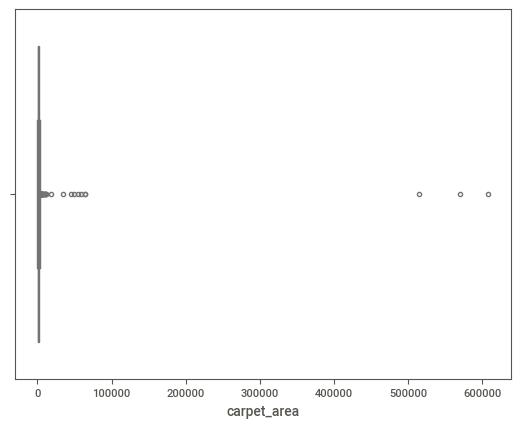

In [61]:
sns.boxplot(x=df['carpet_area'], color='lightgreen')

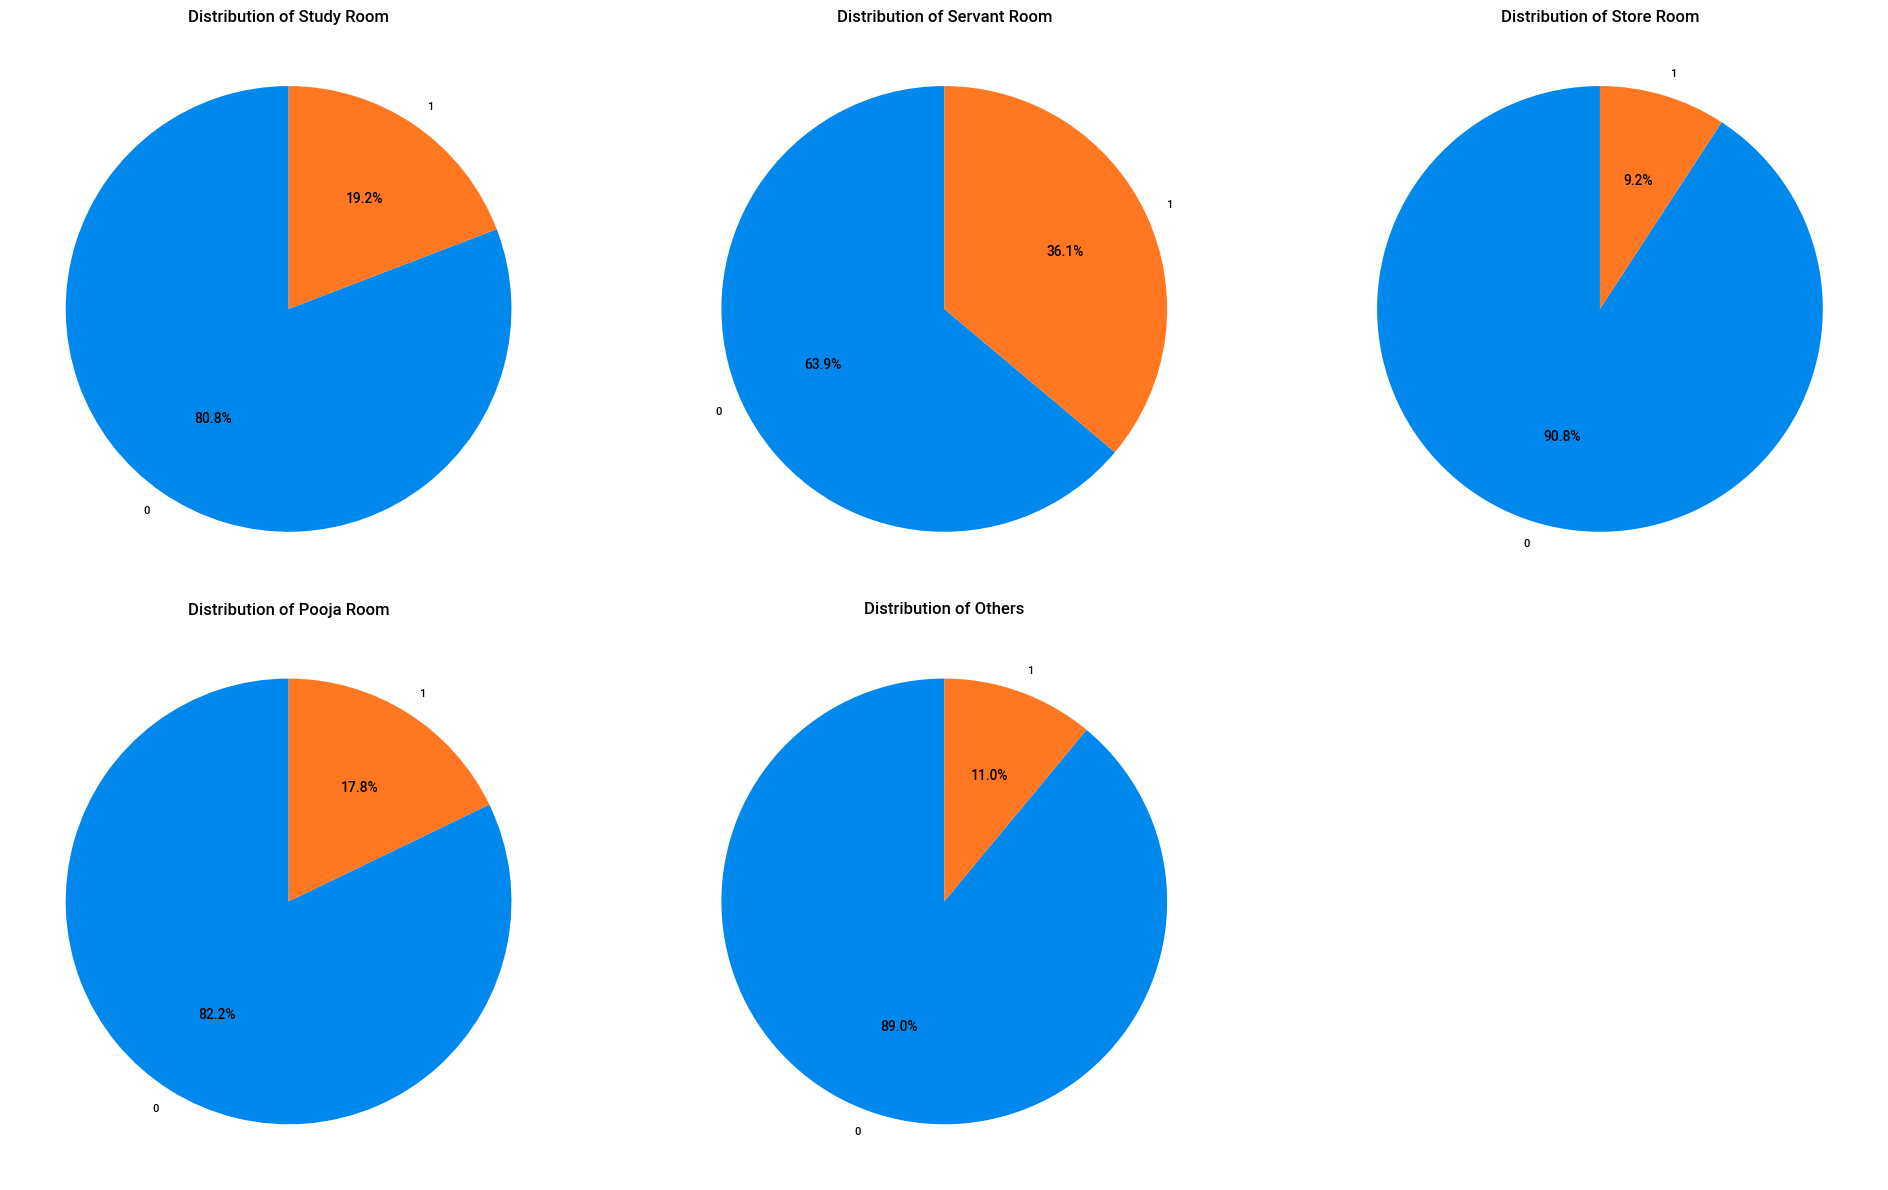

In [62]:
plt.figure(figsize=(20, 12))

for i,col in enumerate(['study room','servant room','store room','pooja room','others'],1):
  ax=plt.subplot(2,3,i)
  df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
  plt.title(f'Distribution of {col.title()}')
  plt.ylabel('')

plt.tight_layout()
plt.show()


<Axes: ylabel='count'>

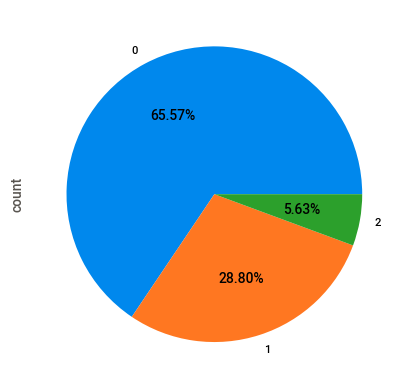

In [63]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [64]:
df['furnishing_type'].value_counts()

,count
furnishing_type,
0,2411
1,1059
2,207


In [65]:
df['luxury_score'].isnull().sum()

np.int64(0)

In [66]:
df['luxury_score'].describe()

,luxury_score
count,3677.000000
mean,71.512918
std,53.059082
min,0.000000
25%,31.000000
50%,59.000000
75%,110.000000
max,174.000000


<Axes: xlabel='luxury_score', ylabel='Count'>

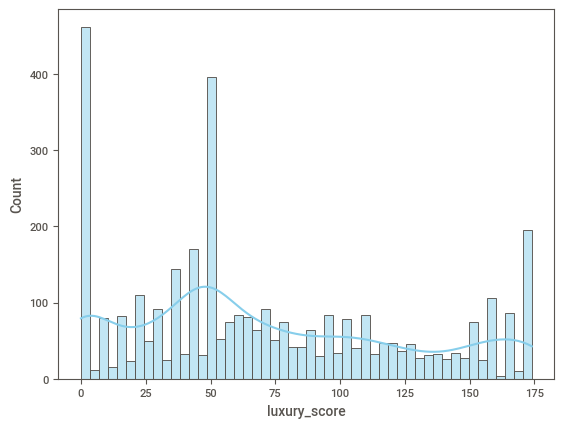

In [67]:
sns.histplot(df['luxury_score'], bins=50, color='skyblue', kde=True)

<Axes: ylabel='luxury_score'>

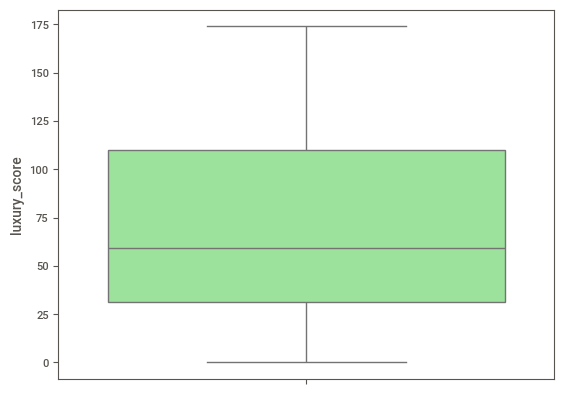

In [68]:
sns.boxplot(df['luxury_score'], color='lightgreen')

                                             |          | [  0%]   00:00 -> (? left)

AttributeError: module 'numpy' has no attribute 'VisibleDeprecationWarning'

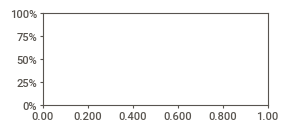

In [69]:
import sweetviz as sv
report = sv.analyze(df)
report.show_html('sweetviz_report.html')

In [ ]:
from ydata_profiling import ProfileReport

df = pd.read_csv('gurgaon_properties_cleaned.csv').drop_duplicates()
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
profile.to_file("output_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 23/23 [00:01<00:00, 17.88it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]